# Cross-validation for discrete structural parameter
Computation of a cross-validation score for different combinations of the number of features $N_f$ and the number of 
clusters $N_c$ used in adaptive kernel density estimation.

In [1]:
import numpy as np
from scipy import io
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import CCA
from adap_ks import adap_ks
from adap_ks_out import adap_ks_out
import euler_curve

In [2]:
# load traveltime data and (inverted) velocity data.
ttdata = np.load('ttdata_disc.npy')
veldata = np.load('veldata_disc.npy')
nsamps = np.size(ttdata, axis=0)

In [3]:
# Insight-driven features

# Build arrays (images) of the inverted velocities.
velimag = np.zeros((49,24,nsamps))
for i in range(nsamps):
    velimag[:,:,i] = veldata[i,:].reshape(49,24)

# compute traveltime histograms.
nbins = 15
tthist = np.zeros([150,nbins])
rang = (np.min(ttdata), np.max(ttdata))
for i in range(len(ttdata)):
    tthist[i,:], _ = np.histogram(ttdata[i,:], bins=nbins, range=rang, density=True)

# compute Euler characteristic curve from inverted velocities.
nthreshold = 100
eulchar = euler_curve.euler_curve(velimag, nthreshold)

In [4]:
# initialize cross-validation matrix.
ndims = 10
nclus = 15
classdiag = np.zeros((nclus,ndims))
pscendiag = np.zeros((nclus,ndims))

In [5]:
# iterate over the cross-validation combinations (may take a while).
# uncomment/comment each of the 6 'blocks' to compute the CV matrix for the corresponding method.
for j in range(ndims):
    try:
        
#        textmeth = 'PCA_t'
#        dim = j+1
#        mypca = PCA(n_components=dim, random_state=5894)
#        lowdim = mypca.fit_transform(ttdata)
        
#        textmeth = 'MDS_t'
#        dim=j+1
#        mymds = manifold.MDS(n_components=dim, random_state=5894, n_init=20)
#        lowdim = mymds.fit_transform(ttdata)
        
#        textmeth = 'PCA_h'
#        dim = j+1
#        mypca = PCA(n_components=dim, random_state=5894)
#        lowdim = mypca.fit_transform(tthist)
        
        textmeth = 'MDS_h'
        from scipy.spatial.distance import pdist, squareform
        from JSD import JSD
        dJS = pdist(tthist, JSD)
        dJS = np.sqrt(dJS)
        dim=j+1
        mymds = manifold.MDS(n_components=dim, random_state=8155, n_init=20, dissimilarity='precomputed')
        lowdim = mymds.fit_transform(squareform(dJS))
        
#        textmeth = 'MDS_v'
#        dim=j+1
#        mymds = manifold.MDS(n_components=dim, random_state=5894, n_init=20)
#        lowdim = mymds.fit_transform(veldata)

#        textmeth = 'MDS_c'
#        dim=j+1
#        mymds = manifold.MDS(n_components=dim, random_state=2358, n_init=20)
#        lowdim = mymds.fit_transform(eulchar)
        
        for l in range(nclus-1):
            
            K = l+2
            obs = lowdim[:,:dim]
            prior = np.array([1/3, 1/3, 1/3])
            dens1 = np.zeros(len(obs))
            dens2 = np.zeros(len(obs))
            dens3 = np.zeros(len(obs))
            dens1[50:] = adap_ks(lowdim[:50,:], dim, K, obs[50:])
            dens2[:50] = adap_ks(lowdim[50:100,:], dim, K, obs[:50])
            dens2[100:] = adap_ks(lowdim[50:100,:], dim, K, obs[100:])
            dens3[:100] = adap_ks(lowdim[100:150,:], dim, K, obs[:100])
            nsims = 50
            for i in range(50):
                #print(i)
                dens1[i] = adap_ks_out(lowdim[:50], dim, K, i, nsims)
                dens2[50+i] = adap_ks_out(lowdim[50:100], dim, K, i, nsims)
                dens3[100+i] = adap_ks_out(lowdim[100:], dim, K, i, nsims)
            
               
            dens = np.column_stack([dens1, dens2, dens3])
            pscen = np.zeros(dens.shape)
            classp = np.zeros(dens.shape)
            for i in range(len(dens)):
               pscen[i] = (prior*dens[i,:])/np.dot(prior,dens[i,:])
               classp[i] = 1*(pscen[i] == np.max(pscen[i]))
               
            # Build classification matrix (confusion matrix) and mean updated probability matrix
            nscen = 3
            pscen_eff = np.zeros([nscen, nscen])
            classp_eff = np.zeros([nscen, nscen])
            for i in range(nscen):
                classp_eff[i] = sum(classp[i*50:(i+1)*50])
                pscen_eff[i] = np.mean(pscen[i*50:(i+1)*50], axis=0)
            classdiag[l,j]=np.sum(np.diag(classp_eff))
            pscendiag[l,j]=np.sum(np.diag(pscen_eff))
            print('score computed for N_f=%i and N_C=%i'%(j+1,K))
    except:
        pass

score computed for N_f=1 and N_C=2
score computed for N_f=1 and N_C=3
score computed for N_f=1 and N_C=4
score computed for N_f=1 and N_C=5
score computed for N_f=1 and N_C=6
score computed for N_f=1 and N_C=7
score computed for N_f=1 and N_C=8
score computed for N_f=1 and N_C=9
score computed for N_f=1 and N_C=10
score computed for N_f=1 and N_C=11
score computed for N_f=1 and N_C=12
score computed for N_f=1 and N_C=13
score computed for N_f=1 and N_C=14
score computed for N_f=1 and N_C=15
score computed for N_f=2 and N_C=2
score computed for N_f=2 and N_C=3
score computed for N_f=2 and N_C=4
score computed for N_f=2 and N_C=5
score computed for N_f=2 and N_C=6
score computed for N_f=2 and N_C=7
score computed for N_f=2 and N_C=8
score computed for N_f=2 and N_C=9
score computed for N_f=2 and N_C=10
score computed for N_f=2 and N_C=11
score computed for N_f=2 and N_C=12
score computed for N_f=2 and N_C=13
score computed for N_f=2 and N_C=14
score computed for N_f=2 and N_C=15
score co

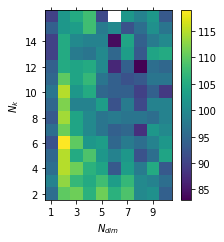

In [13]:
# Plotting the cross-validation matrix

# In case the AKDE computes a bandwidth of zero, the KDE estimation is not defined, then to plot we set:
classdiag[classdiag==0.0] = np.nan

fig, ax = plt.subplots()
fig.set_size_inches(3.5,3.5)
cb = ax.matshow(classdiag, origin='lower')
ax.set_xticks(np.arange(0,10,2))
ax.set_xticklabels(np.arange(1,11,2))
ax.set_yticks(np.arange(0,14,2))
ax.set_yticklabels(np.arange(2,16,2))
ax.tick_params(labelbottom=True, labeltop=False, axis='x')
ax.set_xlabel(r'$N_{dim}$')
ax.set_ylabel(r'$N_k$')
fig.colorbar(cb, orientation='vertical', fraction=.1)